PARTE #1

In [ ]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

##Definimo la función fft2_mod sobre la imagen para centrar la baja frecuencia en lo mas central de la misma

##Definimos la funcion create_gauus_filter para crear el filtro gausiano. Primero generamo sobre una imagen de color fijo de altura h y ancho w igual a la imagen sobre la cual operaremos, creamos luego un filtro gaussiano de NxN, N= 2k+1 que luego centraremos en la imagen de color fijo, se llamará img_b.jpg y generamos su imagen en espacio espectral en fourier_img.jpg.

##Esta función devuelve el filtro gaussiano en espacio espectral.

In [ ]:
def create_gauss_filter (h,w,k,sigma_):

    a_1 = a = np.arange(k*k, step=1).reshape((k,k))
    # np.array([[1,2,1],[2,4,2],[1,2,1]]) #np.random.randint(0,255, size=(k,k))
    gauss_1 = gaussian_filter(a_1, sigma=sigma_)
    b = np.arange(h*w, step=1).reshape((h,w))*0

    
    h_, w_ = int((int(h)/2) - ((k-1)/2)) , int((int(w)/2) - ((k-1)/2))
    
    for m in range(k):
        for n in range(k):
            b[h_+m][w_ + n] = gauss_1[m][n]

            
    cv2.imwrite("img_b.jpg",b)

    t = np.fft.fft2(b)
    
    
    cv2.imwrite("fourier_img.jpg",np.real(t))
    
    return t, gauss_1

##Se realizan las lecturas de las imagenes en escala de grises ya que por cada coordenada que recibe fft2 corresponde a un escalar. Generamos una multiplicaicón sobre la imagen utilizando el img_b.jpg (filtro gaussiano en espacio espectral) y luego invertimos la convolución y centramos las bajas frecuencias nuestra imagen de salida usando shift.

In [ ]:
def plotting_imgs (path , sigma ,k): 

  img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

  filter, _  = create_gauss_filter(np.shape(img)[0],np.shape(img)[1],k,sigma)

  filter_ = np.fft.fft2(img) *  filter

  tff_ = np.fft.ifftshift(np.real(np.fft.ifft2(filter_)))

  return (tff_ , filter)



##Vemos diferencias entre sigma = 1 a sigma = 25, principalmente en los ojos de Chewbacca.

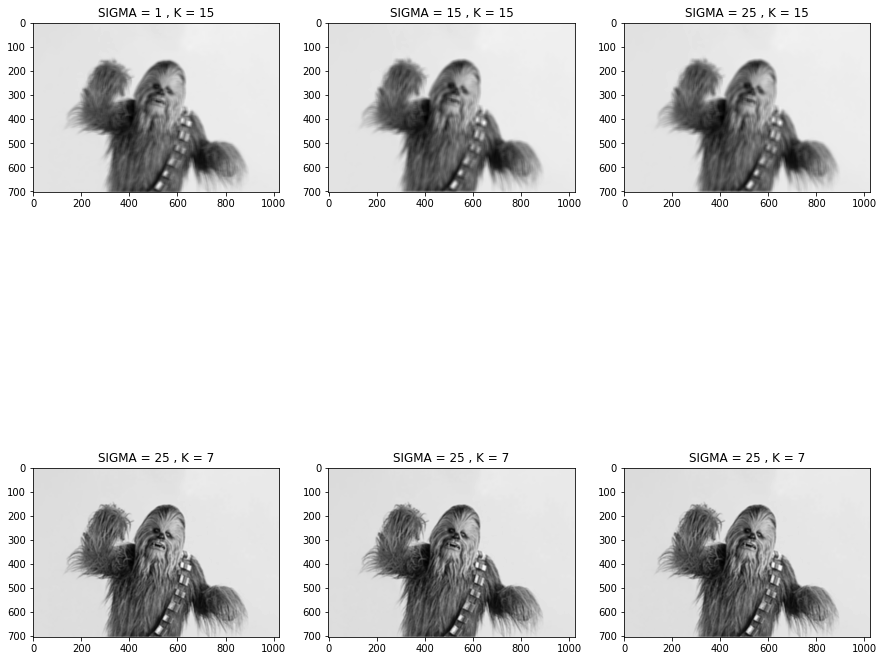

In [ ]:
k = 15
plt.figure(figsize=(15,15))

plt.subplot(231)
plt.title('SIGMA = 1 , K = 15')
plt.imshow(plotting_imgs("/content/chew.jpg",1,k)[0],cmap="gray")
plt.subplot(232)
plt.title('SIGMA = 15 , K = 15')
plt.imshow(plotting_imgs("/content/chew.jpg",15, k)[0], cmap='gray')
plt.subplot(233)
plt.title('SIGMA = 25 , K = 15')
plt.imshow(plotting_imgs("/content/chew.jpg",25, k)[0], cmap='gray')

k = 7

plt.subplot(234)
plt.title('SIGMA = 25 , K = 7')
plt.imshow(plotting_imgs("/content/chew.jpg",25, k)[0], cmap='gray')
plt.subplot(235)
plt.title('SIGMA = 25 , K = 7')
plt.imshow(plotting_imgs("/content/chew.jpg",25, k)[0], cmap='gray')
plt.subplot(236)
plt.title('SIGMA = 25 , K = 7')
plt.imshow(plotting_imgs("/content/chew.jpg",25, k)[0], cmap='gray')

PARTE #2

##Generaremos una primera imagen que tendrá 3 colores diferentes basado en que nuestra imagen tiene un patrón de hexagonos, cada color barre el hexagono en rangos de 60 angulos, pero el valor de gradiente para lineas paralelas es igual, por lo que no es necesario una division en 6 colores para abarcar cada linea del hexagono o cada rango.

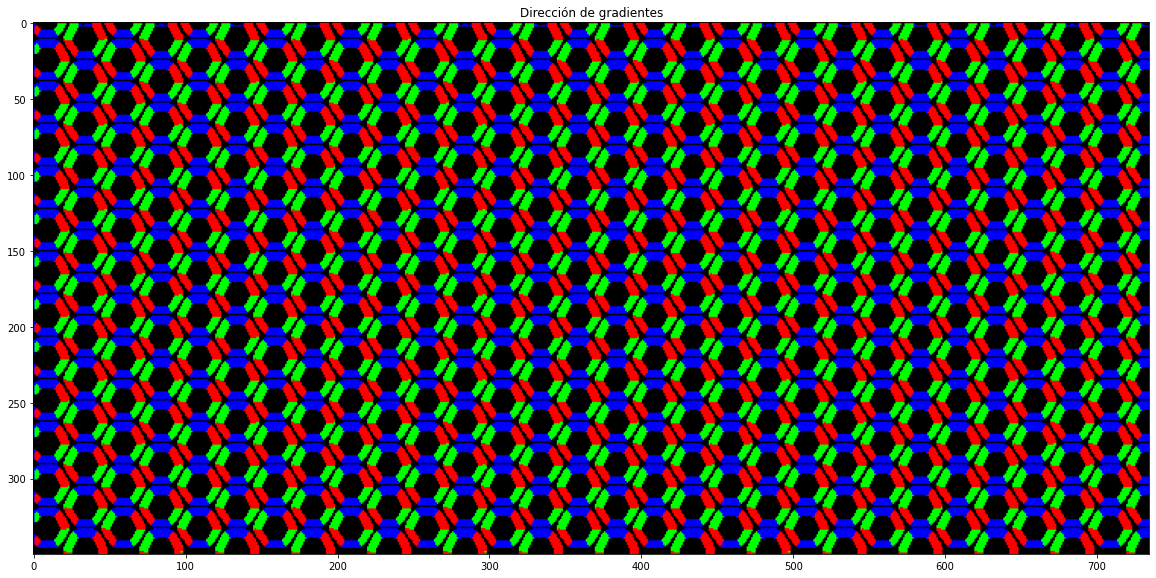

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


def sobel_filters(img):
    
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = cv.filter2D(img, cv.CV_32F, Kx)
    Iy = cv.filter2D(img, cv.CV_32F, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = cv.phase(Ix, Iy, angleInDegrees=True) #np.arctan2(Iy, Ix)
    
    return (G, theta)

img = cv.imread('/content/metalgrid.jpg',0)
img_blur = cv.GaussianBlur(img, (7, 7), 0)
mod, orientation = sobel_filters(img_blur)
image_map = np.zeros((orientation.shape[0], orientation.shape[1], 3), dtype=np.int16)


red = np.array([255, 0, 0])
green = np.array([0, 255, 00])
blue = np.array([0, 0, 255])
yellow = np.array([255, 255, 0])
pink = np.array([159, 43, 104])
purple = np.array([191, 64, 191])

for i in range(0, image_map.shape[0]):
    for j in range(0, image_map.shape[1]):
        if orientation[i][j]   < 60.0 and mod[i][j] > 50:
            image_map[i, j, :] = red
        elif orientation[i][j] >= 60.0 and orientation[i][j] < 120.0 and mod[i][j] > 50:
            image_map[i, j, :] = blue
        elif orientation[i][j] >= 120.0 and orientation[i][j] < 180.0 and mod[i][j] > 50:
            image_map[i, j, :] = green
        elif orientation[i][j] >= 180.0 and orientation[i][j] < 240.0 and mod[i][j] > 50:
            image_map[i, j, :] = red
        elif orientation[i][j] >= 240.0 and orientation[i][j] < 300.0 and mod[i][j] > 50:
            image_map[i, j, :] = blue
        elif orientation[i][j] >= 300.0 and orientation[i][j] < 360.0 and mod[i][j] > 50:
            image_map[i, j, :] = green
        

f, ax1 = plt.subplots(1, 1, figsize=(20,15))

ax1.set_title('Dirección de gradientes')
ax1.imshow(image_map)

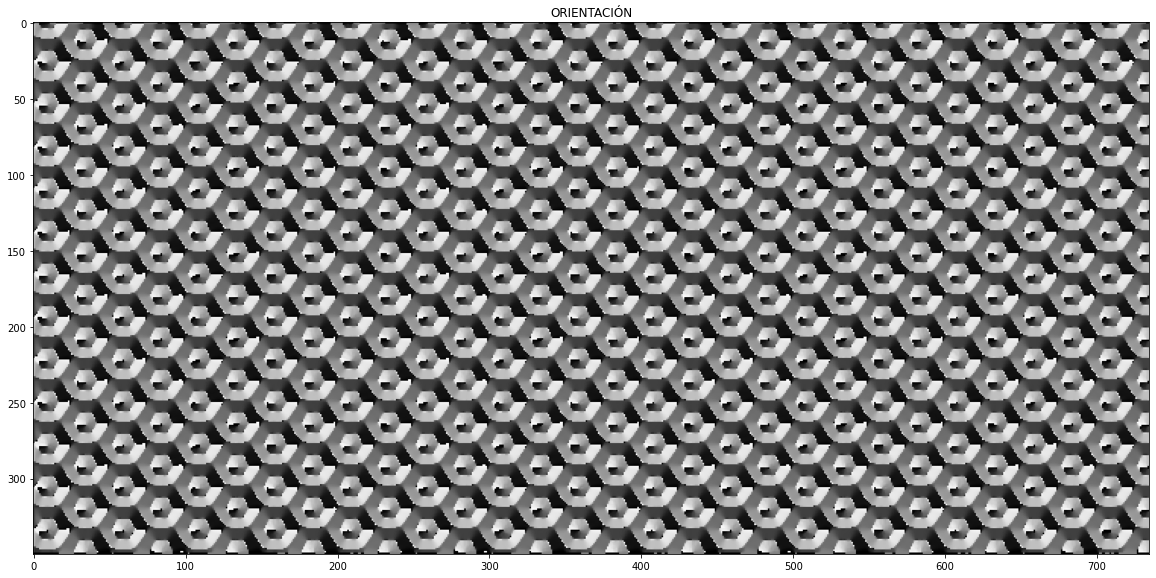

In [ ]:
plt.figure(figsize=(20,15))
plt.title('ORIENTACIÓN')
plt.imshow(orientation, cmap = "gray")

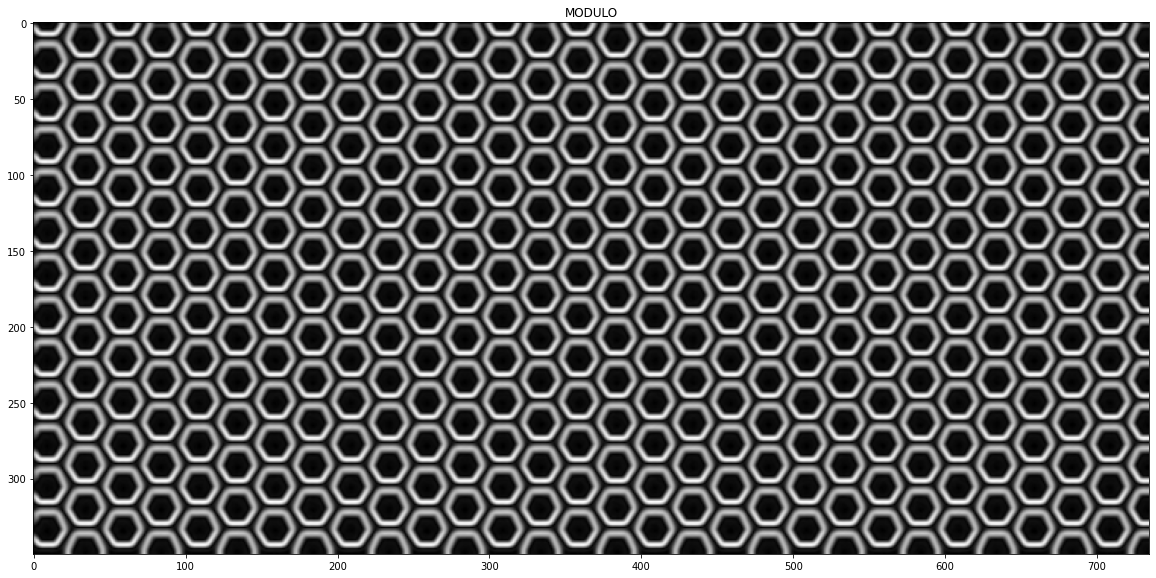

In [ ]:
plt.figure(figsize=(20,15))
plt.title('MODULO')
plt.imshow(mod, cmap = "gray")